In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [27]:
df=pd.read_csv("Data\outlier.csv")
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,20,United-States,<=50K
2,2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [28]:
# Get the categorical columns
categorical_columns = df.select_dtypes(include=["object"]).columns.tolist()
categorical_columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Label encode the categorical columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    # Print the classes for each categorical column
    print(pd.DataFrame({col: le.classes_, 'label': le.transform(le.classes_)}))
    print()

          workclass  label
0       Federal-gov      0
1         Local-gov      1
2      Never-worked      2
3           Private      3
4      Self-emp-inc      4
5  Self-emp-not-inc      5
6         State-gov      6
7       Without-pay      7

       education  label
0           10th      0
1           11th      1
2           12th      2
3        1st-4th      3
4        5th-6th      4
5        7th-8th      5
6            9th      6
7     Assoc-acdm      7
8      Assoc-voc      8
9      Bachelors      9
10     Doctorate     10
11       HS-grad     11
12       Masters     12
13     Preschool     13
14   Prof-school     14
15  Some-college     15

          marital-status  label
0               Divorced      0
1      Married-AF-spouse      1
2     Married-civ-spouse      2
3  Married-spouse-absent      3
4          Never-married      4
5              Separated      5
6                Widowed      6

           occupation  label
0        Adm-clerical      0
1        Armed-Forces      1
2  

In [29]:
df.head()

,Unnamed: 0,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,0,39,6,77516,9,4,0,1,4,1,2174,0,40,38,0
1,1,50,5,83311,9,2,3,0,4,1,0,0,20,38,0
2,2,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
3,3,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
4,4,28,3,338409,9,2,9,5,2,0,0,0,40,4,0


In [30]:
# Remove the "Unnamed" column
df.drop(columns="Unnamed: 0", inplace=True)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,6,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,2,3,0,4,1,0,0,20,38,0
2,38,3,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,2,9,5,2,0,0,0,40,4,0


In [38]:
print(df)

       age  workclass  fnlwgt  education  marital-status  occupation  \
0       39          6   77516          9               4           0   
1       50          5   83311          9               2           3   
2       38          3  215646         11               0           5   
3       53          3  234721          1               2           5   
4       28          3  338409          9               2           9   
...    ...        ...     ...        ...             ...         ...   
47616   33          3  245211          9               4           9   
47617   39          3  215419          9               0           9   
47618   38          3  374983          9               2           9   
47619   44          3   83891          9               0           0   
47620   35          4  182148          9               2           3   

       relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0                 1     4    1          2174             

In [ ]:
df.to_csv("Data\labelencoding_dataset.csv")

In [31]:
# Split to X and y
X = df.drop(columns=['income']) #split income column
y = df['income']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_prediction = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_prediction)
report = classification_report(y_test, y_prediction)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.8430446194225721
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.90      7170
           1       0.72      0.59      0.65      2355

    accuracy                           0.84      9525
   macro avg       0.80      0.76      0.78      9525
weighted avg       0.84      0.84      0.84      9525



In [36]:
# Training accuracy
training_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", training_accuracy)

# Testing accuracy
testing_accuracy = rf_model.score(X_test, y_test)
print("Testing Accuracy:", testing_accuracy)

Training Accuracy: 0.9993437631247375
Testing Accuracy: 0.8430446194225721


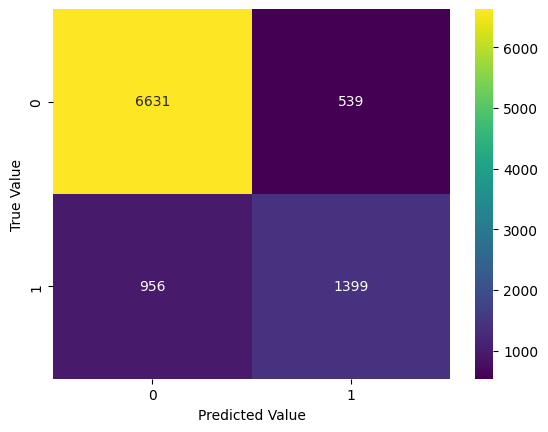

In [37]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True, cmap='viridis', fmt='d')
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.show()